In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

IMPORTING THE DATASETS

In [2]:
# Read the CSV files into Pandas DataFrames
ct_patients = pd.read_csv('CT_patients.csv')
art_patients = pd.read_csv("ct_art_patients.csv")
patient_visits = pd.read_csv("CT_PatientVisits.csv")
patient_labs = pd.read_csv("ct_patient_labs.csv")
patient_depression_scr = pd.read_csv("CT_depressionscreening.csv")

Now that we have imported all the datasets we need, we will now merge them into one dataset, clean and do exploratory data analysis on it.

## EXPLORATORY DATA  ANALYSIS

### DATA CLEANING

The data cleaning process will be done on individual datasets before merging them into one dataset that will be used for the rest of the exploratory data analysis to avoid merging issues.

In [3]:
ct_patients.head()

,Unnamed: 0,PatientPKHash,SiteCode,FacilityName,Region,Gender,LastVisit,EducationLevel,Occupation,MaritalStatus
0,1,78F96823AC7AD6E060E8D69DF686760669A4CCFD34EE70...,16800,Lea Toto Clinic (Westlands),Nairobi,Female,2022-01-19,NaN,NaN,NaN
1,2,FE9A28A6208798FCA425FB02E28B30ACF4DAAAD5E7D2F3...,18828,Lea Toto Zimmerman,Nairobi,Female,2022-01-10,NaN,NaN,NaN
2,3,A38CB015A0BA15BAC709E502AD9A68632EF7D63C45575F...,12965,Guru Nanak Hospital,Nairobi,Female,2023-11-08,NaN,NaN,Single
3,4,DC628EEC29CD06711202042DB171BB4053CFB1B7D3C57C...,12965,Guru Nanak Hospital,Nairobi,Female,2023-12-07,NaN,NaN,Single
4,5,7B9AFEBB3092D6229690F152A77507B931EB4AA1A7E4D1...,18828,Lea Toto Zimmerman,Nairobi,Female,2022-01-13,NaN,NaN,NaN


In [4]:
art_patients.head()  

,Unnamed: 0,PatientPKHash,SiteCode,ExitReason,AgeEnrollment,StartARTDate,AgeLastVisit,AgeARTStart,StartRegimen,LastRegimen
0,1,FFF1D919002BAFBC0E2E547F358A2AF56EBE61525DF6EE...,14947,NaN,26.0,2009-02-24,41.0,29.0,3TC + EFV + TDF,3TC + RTV + AZT + ATV
1,2,F3FE5E7023FECF8776ED0ED6187AF0DB4DB26719AF79E0...,13492,NaN,55.0,2008-10-03,55.0,47.0,3TC+D4T+NVP,3TC+AZT+NVP
2,3,D95DBAB700E9EBB48E62C6D662951961CFCFE492C37410...,14110,NaN,34.0,2011-10-26,46.0,34.0,3TC+AZT+NVP,3TC+DTG+TDF
3,4,030A0046095BDECF76ADC5621D6FE03B9C6570A3432AB9...,15049,NaN,23.0,2014-07-18,25.0,24.0,3TC+AZT+LPV/r,3TC+AZT+LPV/r
4,5,26D6A8AD97C75FFC548F6873E5E93CE475479E3E1A1097...,11476,NaN,37.0,2021-06-02,43.0,40.0,3TC+EFV+TDF,3TC+DTG+TDF


In [5]:
patient_visits.head() 

,Unnamed: 0,PatientPKHash,SiteCode,Adherence,VisitDate,AdherenceCategory,NextAppointmentDate
0,1,F099AA757FCAF0709211D33D7E2FA4CE9A23652C13CAB4...,15204,GOOD,2022-07-04,GOOD,2022-11-01
1,2,3D5061D636B5B454C739195AA7B28692AAECAA098D3E29...,15204,GOOD,2023-05-19,GOOD,2023-08-17
2,3,7BDF500F749AB18900F48C8A30B03EA880AFEBD5F5B176...,15204,GOOD,2023-01-13,GOOD,2023-02-13
3,4,30D8984113ECA227531EC4770A7A4A5929C97FF21A0EFF...,15204,GOOD,2023-01-13,GOOD,2023-05-02
4,5,BB453C54C31C091099809613E80D74EDE582D89FCF9376...,15204,GOOD,2023-12-11,GOOD,2024-03-11


In [6]:
patient_labs.head()  

,Unnamed: 0,PatientPKHash,SiteCode,OrderedbyDate,TestName,TestResult
0,1,3F11BDE0D8DA0B6D8FFCC20FAA79FF0CA3C188B41459C0...,14027,2022-08-25,Viral Load,0
1,2,4EE8F1817816ACA31EC31BF3970A707F941A41241319A8...,13076,2023-02-15,Viral Load,87
2,3,32D913ED2228CC04150FAA7BEC23034183C7147F54A955...,12929,2022-11-19,CHGM,33.5
3,4,7B73C8E14681A416E4A899B18BFAAEC4F22E31BADFAFA1...,14124,2023-05-16,Viral Load,184
4,5,B856DD3933C4A89C78CB9AE675F9943C16B9D3DC8ED7DF...,14020,2023-08-24,Viral Load,LDL


In [7]:
patient_depression_scr.head()

,Unnamed: 0,PatientPKHash,SiteCode,VisitDate,PHQ_9_rating,DepressionAssesmentScore
0,1,13624525CB0A1E56E39C5DBEA36CA40F75C0DDFBB0719F...,16141,2023-01-05,Depression unlikely,NaN
1,2,8AE5AEF927CEFEC4DA2D5C598E737464DA531CCF70DB3C...,13705,2022-11-17,Depression unlikely,NaN
2,3,79A587C5AD7F0876D3F005D5755A3A4FAE841CDFEDEDC7...,19863,2023-10-11,Depression unlikely,NaN
3,4,7D60135BDE9770841CA447E5602841D7E8C2AE735D2390...,14950,2022-07-04,Depression unlikely,NaN
4,5,24795814776BF00333ABB04C43C6983153050A63772E52...,13600,2022-09-20,Depression unlikely,NaN


###### In merging we use the combination of PatientPK and site code. The combination of both as the unique identifier.

In [8]:
# drop the Unnamed column occurring in all the dataframes
dataframes = [ct_patients, art_patients, patient_labs, patient_visits, patient_depression_scr]

for df in dataframes:
    # Check if the column exists
    if 'Unnamed: 0' in df.columns:
        # Drop the column
        df.drop(columns='Unnamed: 0', inplace=True)

We have dropped the ```Unnamed``` column from the all the dataframes. Since all the dataframes share the column ```PatientPKHash``` and ```SiteCode```, we will concatenate the two columns to come up with a unique identifier (```Patient_uid```) and then merge them based on this column. In the next section we will now focus on the individual datasets one at a time for further cleaning.

In [9]:
'''
Concatenate the PatientPKHash and  the SiteCode to form a
unique patient identifier for each patient-facility combination.
This is done for all the imported datasets for uniformity
'''

for df in dataframes:
    # Concatenate the first two columns to form a new column called Patient_uid
    # make the new column appear as the first one
    df.insert(0, 'Patient_uid', df['PatientPKHash'] + df['SiteCode'].astype(str))

    # Drop PatientPKHash column
    df.drop(columns=['PatientPKHash'], inplace=True)

# Confirming the changes
patient_visits.head()

,Patient_uid,SiteCode,Adherence,VisitDate,AdherenceCategory,NextAppointmentDate
0,F099AA757FCAF0709211D33D7E2FA4CE9A23652C13CAB4...,15204,GOOD,2022-07-04,GOOD,2022-11-01
1,3D5061D636B5B454C739195AA7B28692AAECAA098D3E29...,15204,GOOD,2023-05-19,GOOD,2023-08-17
2,7BDF500F749AB18900F48C8A30B03EA880AFEBD5F5B176...,15204,GOOD,2023-01-13,GOOD,2023-02-13
3,30D8984113ECA227531EC4770A7A4A5929C97FF21A0EFF...,15204,GOOD,2023-01-13,GOOD,2023-05-02
4,BB453C54C31C091099809613E80D74EDE582D89FCF9376...,15204,GOOD,2023-12-11,GOOD,2024-03-11


In [10]:
# Drop the SiteCode column from all the datasets except from the ct_patients dataset

# update the list of dataframes
dataframes = [art_patients, patient_labs, patient_visits, patient_depression_scr]

for df in dataframes:
    df.drop(columns = ['SiteCode'], inplace = True)


#### 1. ct_patients

In [11]:
ct_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601947 entries, 0 to 601946
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Patient_uid     601947 non-null  object
 1   SiteCode        601947 non-null  int64 
 2   FacilityName    601809 non-null  object
 3   Region          600059 non-null  object
 4   Gender          601947 non-null  object
 5   LastVisit       601947 non-null  object
 6   EducationLevel  362452 non-null  object
 7   Occupation      315047 non-null  object
 8   MaritalStatus   518036 non-null  object
dtypes: int64(1), object(8)
memory usage: 41.3+ MB


In [12]:
ct_patients['Patient_uid'].nunique() # Checking the number of unique patients contained in the dataset.

601947

The data cleaning phase started with 601947 patients under care treatment as indicated in the output of the cell above.

In [13]:
# Checking for the proportion of null values in the features of the dataset.
ct_patients.isna().sum()

Patient_uid            0
SiteCode               0
FacilityName         138
Region              1888
Gender                 0
LastVisit              0
EducationLevel    239495
Occupation        286900
MaritalStatus      83911
dtype: int64

From the results, ```EducationLevel``` and ```Occupation``` columns have the highest number of missing values but since they are relevant to our analysis, we will fill the null values in these columns with ```Unknown```


In [14]:
# Convert LastVisit column to datetime data type
ct_patients['LastVisit'] = pd.to_datetime(ct_patients['LastVisit'])

# Fill NaN values in 'Occupation' with 'OTHER'
ct_patients['Occupation'].fillna('OTHER', inplace=True)

# Fill NaN values in 'EducationLevel', 'Region', and 'MaritalStatus' with 'Unknown'
ct_patients['EducationLevel'].fillna('Unknown', inplace=True)
ct_patients['Region'].fillna('Unknown', inplace=True)
ct_patients['MaritalStatus'].fillna('Unknown', inplace=True)
ct_patients['FacilityName'].fillna('Missing', inplace=True)

# Drop any duplicated rows
ct_patients.drop_duplicates(inplace = True)

# view the cleaned dataset
ct_patients.head()

,Patient_uid,SiteCode,FacilityName,Region,Gender,LastVisit,EducationLevel,Occupation,MaritalStatus
0,78F96823AC7AD6E060E8D69DF686760669A4CCFD34EE70...,16800,Lea Toto Clinic (Westlands),Nairobi,Female,2022-01-19,Unknown,OTHER,Unknown
1,FE9A28A6208798FCA425FB02E28B30ACF4DAAAD5E7D2F3...,18828,Lea Toto Zimmerman,Nairobi,Female,2022-01-10,Unknown,OTHER,Unknown
2,A38CB015A0BA15BAC709E502AD9A68632EF7D63C45575F...,12965,Guru Nanak Hospital,Nairobi,Female,2023-11-08,Unknown,OTHER,Single
3,DC628EEC29CD06711202042DB171BB4053CFB1B7D3C57C...,12965,Guru Nanak Hospital,Nairobi,Female,2023-12-07,Unknown,OTHER,Single
4,7B9AFEBB3092D6229690F152A77507B931EB4AA1A7E4D1...,18828,Lea Toto Zimmerman,Nairobi,Female,2022-01-13,Unknown,OTHER,Unknown


In the imputation of the NaN values, the missing values in the columns EducationLevel, Region and MaritalStatus are unknown and fill them with ```Unknown```, since some patients prefer not to disclose this information.

However in the Occupation column we fill it with ```OTHER``` because they most certainly have a source of livelihood whether formal or informal. The FacilityName column is accounted for by the SiteCode featuring in the Patient_uid and thus we filled the NaN values with ```'Missing'```.

In this analysis and henceforth, we are going to focus on the patients in the ct_patients dataset ie. this dataset is going to be denominator for all the analysis conducted in this notebook.

In [15]:
# List of DataFrames to be filtered
dataframes = [art_patients, patient_labs, patient_visits, patient_depression_scr]

# Reference DataFrame (ct_patients) with Patient_uid
ct_patients_uid = ct_patients['Patient_uid']

# Filter each DataFrame in the list and reassign the filtered DataFrame back to the list
for i in range(len(dataframes)):
    dataframes[i] = dataframes[i][dataframes[i]['Patient_uid'].isin(ct_patients_uid)]

# Assign filtered DataFrames back to their original variables if needed
art_patients, patient_labs, patient_visits, patient_depression_scr = dataframes

# Confirm changes by checking the unique Patient_uid counts in each DataFrame
print("art_patients unique Patient_uid count:          ", art_patients['Patient_uid'].nunique())
print("patient_labs unique Patient_uid count:          ", patient_labs['Patient_uid'].nunique())
print("patient_visits unique Patient_uid count:        ", patient_visits['Patient_uid'].nunique())
print("patient_depression_scr unique Patient_uid count:", patient_depression_scr['Patient_uid'].nunique())
print("ct_patients unique Patient_uid count:           ", ct_patients_uid.nunique())


art_patients unique Patient_uid count:           596972
patient_labs unique Patient_uid count:           481676
patient_visits unique Patient_uid count:         596737
patient_depression_scr unique Patient_uid count: 244150
ct_patients unique Patient_uid count:            601947


From the filtered datasets, the patient_depression screening dataset has the lowest count (244150) of patients under care treatment because the data on this variable started being collected recently; according to the data warehouse.

#### 2. art_patients

In [16]:
art_patients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 596972 entries, 2 to 2416658
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Patient_uid    596972 non-null  object 
 1   ExitReason     149725 non-null  object 
 2   AgeEnrollment  585745 non-null  float64
 3   StartARTDate   594569 non-null  object 
 4   AgeLastVisit   584942 non-null  float64
 5   AgeARTStart    585744 non-null  float64
 6   StartRegimen   587368 non-null  object 
 7   LastRegimen    594646 non-null  object 
dtypes: float64(3), object(5)
memory usage: 41.0+ MB


In [17]:
# Check for the na values in the dataframe
print(art_patients.isna().sum())

Patient_uid           0
ExitReason       447247
AgeEnrollment     11227
StartARTDate       2403
AgeLastVisit      12030
AgeARTStart       11228
StartRegimen       9604
LastRegimen        2326
dtype: int64


In [18]:
print(f"The ExitReason column is missing {art_patients['ExitReason'].isna().sum() * 100/len(art_patients)} % of the datapoints")

The ExitReason column is missing 74.9192591947361 % of the datapoints


Since we are missing 75% of the ExitReason data, we will drop the column.Other variables that are not relevant to modelling will be consequently dropped off at this point to make processing the data easier.In addition, the ExitReason will be dealt with in the Visits dataset.

To minimize data loss, we are going to assume the missing values in the Regimen columns as unknown since they were not filled in during data collection.

In [19]:
# drop the ExitReason column
art_patients.drop(columns = ['ExitReason', 'StartARTDate', 'AgeEnrollment'], inplace=True)

# Fill missing values in the 'StartRegimen' and 'LastRegimen' columns with 'unknown'
art_patients['StartRegimen'].fillna('unknown', inplace=True)
art_patients['LastRegimen'].fillna('unknown', inplace=True)

# Confirm changes
art_patients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 596972 entries, 2 to 2416658
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Patient_uid   596972 non-null  object 
 1   AgeLastVisit  584942 non-null  float64
 2   AgeARTStart   585744 non-null  float64
 3   StartRegimen  596972 non-null  object 
 4   LastRegimen   596972 non-null  object 
dtypes: float64(2), object(3)
memory usage: 27.3+ MB


In [20]:
# Group by 'Patient_uid', select the last record in each group, reset the index, and view the head of the result
clean_art_patients = art_patients.groupby('Patient_uid').last().reset_index()

# View the first few rows of the resulting DataFrame
clean_art_patients.head()


,Patient_uid,AgeLastVisit,AgeARTStart,StartRegimen,LastRegimen
0,000114516EC31395403FA7C4CC5E7FE8EC7E10D0EC457F...,52.0,47.0,3TC+EFV+TDF,3TC+DTG+TDF
1,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,28.0,24.0,3TC+DTG+TDF,3TC+DTG+TDF
2,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,65.0,58.0,3TC+AZT+NVP,3TC+DTG+TDF
3,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,59.0,55.0,3TC+DTG+TDF,3TC+DTG+TDF
4,00063D813081C740CA5AE358FCCD0A599DCDF651D3281A...,34.0,21.0,3TC+EFV+TDF,3TC+DTG+TDF


For the patients whose ```AgeLastVisit``` is missing, it will be computed later after merging the datasets.

#### 3. patient_visits

In [21]:
# Viewing the information about the visits dataset
patient_visits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3722876 entries, 0 to 10784629
Data columns (total 5 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Patient_uid          object
 1   Adherence            object
 2   VisitDate            object
 3   AdherenceCategory    object
 4   NextAppointmentDate  object
dtypes: object(5)
memory usage: 170.4+ MB


In [22]:
# Convert VisitDate column to datetime data type
patient_visits['VisitDate'] = pd.to_datetime(patient_visits['VisitDate'])

# Convert NextAppointmentDate column to datetime data type
patient_visits['NextAppointmentDate'] = pd.to_datetime(patient_visits['NextAppointmentDate'])

patient_visits.head()

,Patient_uid,Adherence,VisitDate,AdherenceCategory,NextAppointmentDate
0,F099AA757FCAF0709211D33D7E2FA4CE9A23652C13CAB4...,GOOD,2022-07-04,GOOD,2022-11-01
8,E27226B68AD18480FA9F8675885B5DA938F45D3A5FDCFE...,GOOD,2023-02-08,GOOD,2023-05-03
15,B124D27F7ECBA56A6D0ECF541A3255D3317FA12338DDB1...,GOOD,2023-11-28,GOOD,2024-04-10
16,08D874D29AA0A7B61F7C03DCCAEC6E497F47656A3ACB15...,GOOD,2023-01-24,GOOD,2023-04-20
22,7CF5CEAE94221403D5CBD27D25CF6D548F772CA06A445A...,GOOD,2022-05-12,GOOD,2022-09-06


We need to create the ```NextVisit``` column that will be used to determine if the patient is ```IIT``` or not (ie. if the patient interrupted in treatment) by lagging the ```VisitDate``` column and comparing it with the ```NextAppointmentDate``` column.

The dataset under consideration should not go later than 30 November 2023 to allow room for us to ascertain if the patients interrupted in treatment within the next 30 days following the appointment.

In [23]:
# Select records where 'NextAppointmentDate' is before November 30, 2023
filtered_visits = patient_visits[patient_visits['NextAppointmentDate'] < '2023-11-30']

# Group by 'Patient_uid' and sort by 'VisitDate' in ascending order
filtered_visits = filtered_visits.sort_values(by=['Patient_uid', 'VisitDate'], ascending=[True, True])

# Shift 'VisitDate' to get 'NextVisit' within each group
filtered_visits['NextVisit'] = filtered_visits.groupby('Patient_uid')['VisitDate'].shift(-1)

# Drop the last records whose 'NextVisit' values are missing
filtered_visits = filtered_visits.dropna(subset=['NextVisit'])

# Drop the grouping index to ungroup the DataFrame
filtered_visits.reset_index(drop=True, inplace=True)

# View head
filtered_visits.head()


,Patient_uid,Adherence,VisitDate,AdherenceCategory,NextAppointmentDate,NextVisit
0,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,NaN,2022-01-21,ART|CTX,2022-05-21,2022-05-20
1,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,NaN,2022-05-20,ART|CTX,2022-10-20,2022-10-20
2,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,Good|Good,2022-10-20,ART|CTX,2023-02-17,2023-02-17
3,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,Good|Good,2023-02-17,ART|CTX,2023-05-17,2023-05-17
4,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,NaN,2023-05-17,ART|CTX,2023-08-17,2023-08-19


After engineering the NextVisit column by lagging the VisitDate column, we drop the records for the most recent Visit for each patient before we proceed since we cannot have their NextVisit date (due to lagging).
More to the point, this is the sole purpose of our predictive analysis which aims at predicting if the patient will come to the facility in the next visit or they will interrupt in treatment.

In [24]:
# confirming missing values for the NextVisit column 
filtered_visits.isna().sum()

Patient_uid                 0
Adherence              616219
VisitDate                   0
AdherenceCategory       81044
NextAppointmentDate         0
NextVisit                   0
dtype: int64

According to the ART guidelines, a patient is said to have interrupted in treatment if they do not meet the appointment given within the next 30 days following the appointment date and thus we use this criteria to select those patients who might have interrupted in care treatment.

In [26]:
# create a new column called Status which will take a value "IIT" if the difference between NextVisit and NextAppointmentDate is more than 30days
# else take a value "In Treatment"

filtered_visits['Status'] = 'In Treatment'
filtered_visits.loc[(filtered_visits['NextVisit'] - filtered_visits['NextAppointmentDate']).dt.days > 30, 'Status'] = 'IIT'


In [27]:
# checking for missing values
filtered_visits.isna().sum()

Patient_uid                 0
Adherence              616219
VisitDate                   0
AdherenceCategory       81044
NextAppointmentDate         0
NextVisit                   0
Status                      0
dtype: int64

In [28]:
filtered_visits.head()

,Patient_uid,Adherence,VisitDate,AdherenceCategory,NextAppointmentDate,NextVisit,Status
0,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,NaN,2022-01-21,ART|CTX,2022-05-21,2022-05-20,In Treatment
1,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,NaN,2022-05-20,ART|CTX,2022-10-20,2022-10-20,In Treatment
2,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,Good|Good,2022-10-20,ART|CTX,2023-02-17,2023-02-17,In Treatment
3,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,Good|Good,2023-02-17,ART|CTX,2023-05-17,2023-05-17,In Treatment
4,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,NaN,2023-05-17,ART|CTX,2023-08-17,2023-08-19,In Treatment


We will now consider the patient lateness history by computing the lateness as indicated by the number of times the patient has interrupted in treatment initially as a percentage of the total visits made by that particular patient. This will give the overall view of the patient's appointment adherence.

We will as well compute the percentage of appointment adherence for the last 3 appointments for us to determine the most recent behaviour of the patient with regard to the visits.

In [36]:
# Sort the DataFrame by Patient_uid and VisitDate
filtered_visits = filtered_visits.sort_values(by=['Patient_uid', 'VisitDate'])

# Group by Patient_uid and count total visits
total_visits = filtered_visits.groupby('Patient_uid').size().reset_index(name='TotalVisits')

# Count IIT visits
iit_visits = filtered_visits[filtered_visits['Status'] == 'IIT'].groupby('Patient_uid').size().reset_index(name='IITVisits')

# Merge the total visits and IIT visits
adherence_percentage = pd.merge(total_visits, iit_visits, on='Patient_uid', how='left')

# Fill NaN values in IITVisits with 0 (patients with no IIT visits)
adherence_percentage['IITVisits'] = adherence_percentage['IITVisits'].fillna(0)

# Calculate the percentage of IIT visits
adherence_percentage['IITPercentage'] = (adherence_percentage['IITVisits'] / adherence_percentage['TotalVisits']) * 100

# Group by Patient_uid and take the last 3 visits
last_3_visits = filtered_visits.groupby('Patient_uid').tail(3)

# Total visits in the last 3 visits per patient
total_last_3_visits = last_3_visits.groupby('Patient_uid').size().reset_index(name='TotalLast3Visits')

# IIT visits in the last 3 visits per patient
iit_last_3_visits = last_3_visits[last_3_visits['Status'] == 'IIT'].groupby('Patient_uid').size().reset_index(name='IITLast3Visits')

# Merge the dataframes
patient_last_3_visits = pd.merge(total_last_3_visits, iit_last_3_visits, on='Patient_uid', how='left')

# Fill NaN values in IITLast3Visits with 0 (patients with no IIT visits in the last 3 visits)
patient_last_3_visits['IITLast3Visits'] = patient_last_3_visits['IITLast3Visits'].fillna(0)

# Calculate the percentage of IIT visits in the last 3 visits
patient_last_3_visits['IITLast3Percentage'] = (patient_last_3_visits['IITLast3Visits'] / patient_last_3_visits['TotalLast3Visits']) * 100

# Merge with adherence_percentage to include last 3 visits data
adherence_percentage = pd.merge(adherence_percentage, patient_last_3_visits, on='Patient_uid', how='left')

# Display the final DataFrame
adherence_percentage.head()

,Patient_uid,TotalVisits,IITVisits,IITPercentage,TotalLast3Visits,IITLast3Visits,IITLast3Percentage
0,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,5,0.0,0.0,3,0.0,0.000000
1,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,3,0.0,0.0,3,0.0,0.000000
2,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,4,1.0,25.0,3,1.0,33.333333
3,00063D813081C740CA5AE358FCCD0A599DCDF651D3281A...,5,0.0,0.0,3,0.0,0.000000
4,00063D813081C740CA5AE358FCCD0A599DCDF651D3281A...,2,0.0,0.0,2,0.0,0.000000


In [37]:
# drop the IIT counts to remain with the percentages and the total visits
adherence_percentage = adherence_percentage[["Patient_uid", "TotalVisits", "IITPercentage", "IITLast3Percentage"]]

# confirm changes
adherence_percentage.head()

,Patient_uid,TotalVisits,IITPercentage,IITLast3Percentage
0,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,5,0.0,0.000000
1,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,3,0.0,0.000000
2,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,4,25.0,33.333333
3,00063D813081C740CA5AE358FCCD0A599DCDF651D3281A...,5,0.0,0.000000
4,00063D813081C740CA5AE358FCCD0A599DCDF651D3281A...,2,0.0,0.000000


We will now filter out to remain with the records for the most recent visits for each patient.

In [38]:
# sort by 'Patient_uid' and 'VisitDate'
filtered_visits = filtered_visits.sort_values(by=['Patient_uid', 'VisitDate'], ascending=[True, True])

# Group by 'Patient_uid' and get the index of the most recent 'VisitDate' within each group
most_recent_visits_idx = filtered_visits.groupby('Patient_uid')['VisitDate'].idxmax()

# Select the most recent records based on the indices
most_recent_visits = filtered_visits.loc[most_recent_visits_idx]

# Reset index for the resulting DataFrame
most_recent_visits.reset_index(drop=True, inplace=True)

# View head
most_recent_visits.head()


,Patient_uid,Adherence,VisitDate,AdherenceCategory,NextAppointmentDate,NextVisit,Status
0,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,NaN,2023-05-17,ART|CTX,2023-08-17,2023-08-19,In Treatment
1,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,Good|Good,2022-12-14,ART|CTX,2023-06-15,2023-06-16,In Treatment
2,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,NaN,2023-06-23,ART|CTX,2023-07-20,2023-06-26,In Treatment
3,00063D813081C740CA5AE358FCCD0A599DCDF651D3281A...,good|,2023-07-21,ART|CTX,2023-09-29,2023-09-29,In Treatment
4,00063D813081C740CA5AE358FCCD0A599DCDF651D3281A...,good|,2022-11-14,ART|CTX,2023-02-20,2023-02-20,In Treatment


In [39]:
# overview of the new dataframe
most_recent_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551590 entries, 0 to 551589
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Patient_uid          551590 non-null  object        
 1   Adherence            425623 non-null  object        
 2   VisitDate            551590 non-null  datetime64[ns]
 3   AdherenceCategory    541701 non-null  object        
 4   NextAppointmentDate  551590 non-null  datetime64[ns]
 5   NextVisit            551590 non-null  datetime64[ns]
 6   Status               551590 non-null  object        
dtypes: datetime64[ns](3), object(4)
memory usage: 29.5+ MB


In [40]:
# checking for the unique values of the adherence categories
print(most_recent_visits['Adherence'].unique())
print(most_recent_visits['AdherenceCategory'].unique())

[nan 'Good|Good' 'good|' 'GOOD' 'Good|Poor' 'Poor|Poor' 'FAIR' 'POOR'
 'Poor|Good' '0' 'poor|' 'Good|Fair']
['ART|CTX' nan 'ARV' 'GOOD' 'FAIR' 'POOR']


Since only a small portion of the data is missing in the ```NextAppointmet``` column we'll drop the missing data points from the visits dataset.

In [41]:
# Drop the datapoints with the missing values in this column
most_recent_visits.dropna(subset=['NextAppointmentDate'], inplace=True)

# confirm the changes
most_recent_visits.isna().sum()

Patient_uid                 0
Adherence              125967
VisitDate                   0
AdherenceCategory        9889
NextAppointmentDate         0
NextVisit                   0
Status                      0
dtype: int64

In [42]:
# Extracting the first part of the values in the Adherence column
most_recent_visits['Adherence'] = most_recent_visits['Adherence'].str.split('|').str[0]

# view modifications
most_recent_visits['Adherence'].unique()

array([nan, 'Good', 'good', 'GOOD', 'Poor', 'FAIR', 'POOR', '0', 'poor'],
      dtype=object)

In [43]:
# Replace "0" with NaN in 'Adherence' column
most_recent_visits['Adherence'] = most_recent_visits['Adherence'].replace('0', np.nan)

# Convert 'Adherence' column to lowercase
most_recent_visits['Adherence'] = most_recent_visits['Adherence'].str.lower()

# View head
most_recent_visits.head()

,Patient_uid,Adherence,VisitDate,AdherenceCategory,NextAppointmentDate,NextVisit,Status
0,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,NaN,2023-05-17,ART|CTX,2023-08-17,2023-08-19,In Treatment
1,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,good,2022-12-14,ART|CTX,2023-06-15,2023-06-16,In Treatment
2,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,NaN,2023-06-23,ART|CTX,2023-07-20,2023-06-26,In Treatment
3,00063D813081C740CA5AE358FCCD0A599DCDF651D3281A...,good,2023-07-21,ART|CTX,2023-09-29,2023-09-29,In Treatment
4,00063D813081C740CA5AE358FCCD0A599DCDF651D3281A...,good,2022-11-14,ART|CTX,2023-02-20,2023-02-20,In Treatment


Since we are only interested on the art adherence, we'll drop the AdherenceCategory column. The CTX category indicates the level of adherence to the drug for treating opportunistic infections which is not our interest.

In [44]:
# Drop the AdherenceCategory
most_recent_visits.drop(columns='AdherenceCategory', inplace=True)

# Rename 'Adherence' column to 'ArtAdherence'
most_recent_visits.rename(columns={'Adherence': 'ArtAdherence'}, inplace=True)

# check for further missing values
most_recent_visits.isna().sum()

Patient_uid                 0
ArtAdherence           126087
VisitDate                   0
NextAppointmentDate         0
NextVisit                   0
Status                      0
dtype: int64

In [45]:
most_recent_visits['ArtAdherence'].value_counts()

ArtAdherence
good    423005
poor      2253
fair       245
Name: count, dtype: int64

We are going to use mode imputation to fill in the missing values in the ArtAdherence column to minimize data loss.
From the value counts the mode is clearly 'good'

In [46]:
# Fill missing values in the 'ArtAdherence' column with the mode
most_recent_visits['ArtAdherence'].fillna('good', inplace=True)

# confirm the changes
most_recent_visits.isna().sum()

Patient_uid            0
ArtAdherence           0
VisitDate              0
NextAppointmentDate    0
NextVisit              0
Status                 0
dtype: int64

In [47]:
# rename the dataset 
clean_visits = most_recent_visits
# view head
clean_visits.head()

,Patient_uid,ArtAdherence,VisitDate,NextAppointmentDate,NextVisit,Status
0,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,good,2023-05-17,2023-08-17,2023-08-19,In Treatment
1,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,good,2022-12-14,2023-06-15,2023-06-16,In Treatment
2,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,good,2023-06-23,2023-07-20,2023-06-26,In Treatment
3,00063D813081C740CA5AE358FCCD0A599DCDF651D3281A...,good,2023-07-21,2023-09-29,2023-09-29,In Treatment
4,00063D813081C740CA5AE358FCCD0A599DCDF651D3281A...,good,2022-11-14,2023-02-20,2023-02-20,In Treatment


#### 5. Patient_labs

In [48]:
patient_labs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960843 entries, 2 to 2798980
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Patient_uid    960843 non-null  object
 1   OrderedbyDate  960843 non-null  object
 2   TestName       939604 non-null  object
 3   TestResult     952197 non-null  object
dtypes: object(4)
memory usage: 36.7+ MB


In [49]:
# check for na values
patient_labs.isna().sum()

Patient_uid          0
OrderedbyDate        0
TestName         21239
TestResult        8646
dtype: int64

In [50]:
patient_labs.head()

,Patient_uid,OrderedbyDate,TestName,TestResult
2,32D913ED2228CC04150FAA7BEC23034183C7147F54A955...,2022-11-19,CHGM,33.5
3,7B73C8E14681A416E4A899B18BFAAEC4F22E31BADFAFA1...,2023-05-16,Viral Load,184
4,B856DD3933C4A89C78CB9AE675F9943C16B9D3DC8ED7DF...,2023-08-24,Viral Load,LDL
8,3E95E21174ABA132640AE817EEA6CB841D928D036D775A...,2022-09-15,Viral Load,LDL
12,48295DE0AF8BE5C7902170AC88297D091CEFAEE0E14E3D...,2022-06-14,Viral Load,396


In [51]:
# Check the number of tests run on eaxh patient
patient_labs['TestName'].unique()

array(['CHGM', 'Viral Load', 'CD4 Count', 'LYM2', 'FLDEX4 -MON2 %',
       'GeneXpert', nan, 'PCR', 'Tryglicerid', 'HGM',
       'Determine rapid test', 'Creatinine',
       'Hepatitis B Surface Antigen Test', 'PCRq',
       'Serum Cryptococcal Ag', 'LYM', 'CD4 Percentage',
       'Sputum for Acid Fast Bacilli', 'Unigold ', 'FLDEX1 - MON',
       'Tuberculosis', 'Leuco', 'Serum creatinine (umol/L)', 'ALT',
       'VDRL Titre', 'PCT', 'mpv', 'SERUM GLUTAMIC-PYRUVIC TRANSAMINASE',
       'PDW', 'SPUTUM FOR ACID FAST BACILLI', 'Glycemia',
       'Rapid Plasma Reagin', 'sputum for acid fast bacilli', 'ColTot',
       'Hema', 'Hemo', 'GPT', 'Oraquick', 'UREA', 'GOT',
       'URINE PREGNANCY TEST', 'MXD2', 'MXD', 'Eritro', 'K', 'ColHDL',
       'HBA1C', 'RDWCV', 'RVGM', 'BILD', 'serum cryptococcal ag',
       'TB LAM', 'NEUT2',
       'HIV DNA POLYMERASE CHAIN REACTION, QUALITATIVE',
       'Hepatitis B surface antigen spot test',
       'Treponema Pallidum Hemagglutination Assay, Qualitativ

From the tests above, we are only interested in the results for ```Viral Load```, ```CD4 Count``` and ```CD4 Percentage``` tests for our analysis.

In [52]:
# Filter the DataFrame
patient_tests = patient_labs[patient_labs['TestName'].isin(['Viral Load', 'CD4 Count', 'CD4 Percentage'])]

# Show the filtered DataFrame
patient_tests.head()

,Patient_uid,OrderedbyDate,TestName,TestResult
3,7B73C8E14681A416E4A899B18BFAAEC4F22E31BADFAFA1...,2023-05-16,Viral Load,184
4,B856DD3933C4A89C78CB9AE675F9943C16B9D3DC8ED7DF...,2023-08-24,Viral Load,LDL
8,3E95E21174ABA132640AE817EEA6CB841D928D036D775A...,2022-09-15,Viral Load,LDL
12,48295DE0AF8BE5C7902170AC88297D091CEFAEE0E14E3D...,2022-06-14,Viral Load,396
17,EA90E1F03785E46B35FB06D8725255B26791C7D6BE7E39...,2023-02-17,Viral Load,LDL


 Suppressed VL < 200
 Unsuppressed VL > 200
 Validity based on age breakpoint 24yrs (<24 6months, >24 12 months)

In [53]:
# Replace text values with 0 in 'TestResult' column
patient_tests['TestResult'] = pd.to_numeric(patient_tests['TestResult'], errors='coerce').fillna(0)

# Convert 'OrderedbyDate' to datetime 
patient_tests['OrderedbyDate'] = pd.to_datetime(patient_tests['OrderedbyDate'], errors='coerce')

# Convert 'TestResult' column to float data type
patient_tests['TestResult'] = patient_tests['TestResult'].astype(float)

# Group by 'Patient_uid', sort by 'OrderedbyDate', and get the latest entry for each group
recent_tests = patient_tests.sort_values('OrderedbyDate').groupby('Patient_uid').last()

# Reset index to make 'Patient_uid' a column
recent_tests.reset_index(inplace=True)

# View changes
recent_tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478242 entries, 0 to 478241
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Patient_uid    478242 non-null  object        
 1   OrderedbyDate  478242 non-null  datetime64[ns]
 2   TestName       478242 non-null  object        
 3   TestResult     478242 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 14.6+ MB


In [54]:
# Find the index of the rows with the most recent test result for each test and patient
recent_test_indices = recent_tests.groupby(['TestName', 'Patient_uid'])['OrderedbyDate'].idxmax()

# Use the indices to select the corresponding rows
most_recent_results = recent_tests.loc[recent_test_indices]

# Pivot the DataFrame to have TestName as columns and TestResult as values
most_recent_results_pivot = most_recent_results.pivot(index='Patient_uid', columns='TestName', values='TestResult')

# Reset the index to make 'Patient_uid' a regular column
most_recent_results_pivot.reset_index(inplace=True)

# Display the new dataframe with the most recent test results for each test
most_recent_results_pivot.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478242 entries, 0 to 478241
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Patient_uid     478242 non-null  object 
 1   CD4 Count       21754 non-null   float64
 2   CD4 Percentage  1916 non-null    float64
 3   Viral Load      454572 non-null  float64
dtypes: float64(3), object(1)
memory usage: 14.6+ MB


In [55]:
most_recent_results_pivot.isna().sum()

TestName
Patient_uid            0
CD4 Count         456488
CD4 Percentage    476326
Viral Load         23670
dtype: int64

From the results of the pivot table we notice that there are very few data points on the CD4 count and CD4 percentage and therefore we wont be able to use these columns for prediction purposes.

We will however proceed with the Viral Load feature since it can be used in place of the other two features to indicate the disease progression.

In [56]:
# drop the unwanted columns
viral_load = most_recent_results_pivot.drop(columns = ['CD4 Count','CD4 Percentage'])
viral_load.head()

TestName,Patient_uid,Viral Load
0,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,0.0
1,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,40.0
2,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,0.0
3,00063D813081C740CA5AE358FCCD0A599DCDF651D3281A...,0.0
4,00063D813081C740CA5AE358FCCD0A599DCDF651D3281A...,0.0


In [57]:
viral_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478242 entries, 0 to 478241
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Patient_uid  478242 non-null  object 
 1   Viral Load   454572 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.3+ MB


  #### 6. patient_depression_scr

In [58]:
# Get the information
patient_depression_scr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606357 entries, 7 to 1763283
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Patient_uid               606357 non-null  object 
 1   VisitDate                 606357 non-null  object 
 2   PHQ_9_rating              606357 non-null  object 
 3   DepressionAssesmentScore  0 non-null       float64
dtypes: float64(1), object(3)
memory usage: 23.1+ MB


In [60]:
# convert the VisitDate column into date time data type
patient_depression_scr['VisitDate'] = pd.to_datetime(patient_depression_scr['VisitDate'])

In [61]:
# check for missing values
patient_depression_scr.isna().sum()

Patient_uid                      0
VisitDate                        0
PHQ_9_rating                     0
DepressionAssesmentScore    606357
dtype: int64

In [63]:
# we drop the DepressionAssesmentScore column
patient_depression_scr.drop(columns= ["DepressionAssesmentScore"], inplace=True)

patient_depression_scr.head()

,Patient_uid,VisitDate,PHQ_9_rating
7,7A31D0A5810D6D14151D2F72C09AC936916FCECF78AE6A...,2023-08-07,Depression unlikely
9,E6DA192A645AB237FC8E3AB655CD41B85856E116048415...,2022-09-23,Depression unlikely
13,1A950AC8770FF4D61D0065D6F12D7A2526153A0CB42862...,2022-11-14,Depression unlikely
15,9B610988E512CFC1C16CAE77EB6C0E78961E443F57C293...,2022-07-27,Depression unlikely
17,DC60CC09D0B1A734061DEC59DE591AAC2B7E057503133E...,2022-09-20,Depression unlikely


We are going to select the most recent depression screening for each patient.

In [64]:
# Sort the DataFrame by Patient_uid and VisitDate in descending order
patient_depression_scr = patient_depression_scr.sort_values(by=['Patient_uid', 'VisitDate'], ascending=[True, False])

# Drop duplicates, keeping the first (most recent) entry for each patient
patient_depression_scr = patient_depression_scr.drop_duplicates(subset='Patient_uid', keep='first')

# Display the result
patient_depression_scr.head()

,Patient_uid,VisitDate,PHQ_9_rating
1591235,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,2023-11-20,Depression unlikely
1758628,00024CAFCC9014E3F0A15887E2467B31037C5741B4E049...,2023-10-24,Depression unlikely
199784,00063D813081C740CA5AE358FCCD0A599DCDF651D3281A...,2023-09-18,Depression unlikely
533137,00063D813081C740CA5AE358FCCD0A599DCDF651D3281A...,2023-10-22,Depression unlikely
1674828,00063D813081C740CA5AE358FCCD0A599DCDF651D3281A...,2023-09-19,Depression unlikely


In [67]:
# Rename the VisitDate column to ScreeningDate
patient_depression_scr = patient_depression_scr.rename(columns={'VisitDate': 'ScreeningDate'})

patient_depression_scr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244150 entries, 1591235 to 885339
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Patient_uid    244150 non-null  object        
 1   ScreeningDate  244150 non-null  datetime64[ns]
 2   PHQ_9_rating   244150 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 7.5+ MB


### Merging The Datasets

In [71]:
clean_dfs = [ct_patients, clean_art_patients, clean_visits, adherence_percentage, viral_load, patient_depression_scr]

# Merge dataframes on 'Patient_uid' column
merged_df = None
for df in clean_dfs:
    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on='Patient_uid', how='left')

merged_df.head()

,Patient_uid,SiteCode,FacilityName,Region,Gender,LastVisit,EducationLevel,Occupation,MaritalStatus,AgeLastVisit,...,VisitDate,NextAppointmentDate,NextVisit,Status,TotalVisits,IITPercentage,IITLast3Percentage,Viral Load,ScreeningDate,PHQ_9_rating
0,78F96823AC7AD6E060E8D69DF686760669A4CCFD34EE70...,16800,Lea Toto Clinic (Westlands),Nairobi,Female,2022-01-19,Unknown,OTHER,Unknown,20.0,...,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,FE9A28A6208798FCA425FB02E28B30ACF4DAAAD5E7D2F3...,18828,Lea Toto Zimmerman,Nairobi,Female,2022-01-10,Unknown,OTHER,Unknown,16.0,...,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,A38CB015A0BA15BAC709E502AD9A68632EF7D63C45575F...,12965,Guru Nanak Hospital,Nairobi,Female,2023-11-08,Unknown,OTHER,Single,44.0,...,2022-11-03,2023-05-03,2023-04-26,In Treatment,1.0,0.0,0.0,21.0,NaT,NaN
3,DC628EEC29CD06711202042DB171BB4053CFB1B7D3C57C...,12965,Guru Nanak Hospital,Nairobi,Female,2023-12-07,Unknown,OTHER,Single,45.0,...,2023-01-25,2023-04-20,2023-05-08,In Treatment,2.0,0.0,0.0,59.0,NaT,NaN
4,7B9AFEBB3092D6229690F152A77507B931EB4AA1A7E4D1...,18828,Lea Toto Zimmerman,Nairobi,Female,2022-01-13,Unknown,OTHER,Unknown,11.0,...,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN


We note that some records are missing the VisitDate which makes it hard to analyze their visits thus we drop their records.

In [74]:
# Drop records with missing VisitDate
merged_df = merged_df.dropna(subset=['VisitDate'])

# confirm changes
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 551590 entries, 2 to 601946
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Patient_uid          551590 non-null  object        
 1   SiteCode             551590 non-null  int64         
 2   FacilityName         551590 non-null  object        
 3   Region               551590 non-null  object        
 4   Gender               551590 non-null  object        
 5   LastVisit            551590 non-null  datetime64[ns]
 6   EducationLevel       551590 non-null  object        
 7   Occupation           551590 non-null  object        
 8   MaritalStatus        551590 non-null  object        
 9   AgeLastVisit         541000 non-null  float64       
 10  AgeARTStart          541002 non-null  float64       
 11  StartRegimen         551116 non-null  object        
 12  LastRegimen          551116 non-null  object        
 13  ArtAdherence       

In [75]:
merged_df.isna().sum()

Patient_uid                 0
SiteCode                    0
FacilityName                0
Region                      0
Gender                      0
LastVisit                   0
EducationLevel              0
Occupation                  0
MaritalStatus               0
AgeLastVisit            10590
AgeARTStart             10588
StartRegimen              474
LastRegimen               474
ArtAdherence                0
VisitDate                   0
NextAppointmentDate         0
NextVisit                   0
Status                      0
TotalVisits                 0
IITPercentage               0
IITLast3Percentage          0
Viral Load             106085
ScreeningDate          313669
PHQ_9_rating           313669
dtype: int64

In [76]:
# drop any duplicate entires that might be present 
merged_df.drop_duplicates()

# fill the missing values in the PHQ_9_rating column with unscreened
merged_df['PHQ_9_rating'].fillna("unscreened", inplace=True)
 
merged_df.isna().sum()

Patient_uid                 0
SiteCode                    0
FacilityName                0
Region                      0
Gender                      0
LastVisit                   0
EducationLevel              0
Occupation                  0
MaritalStatus               0
AgeLastVisit            10590
AgeARTStart             10588
StartRegimen              474
LastRegimen               474
ArtAdherence                0
VisitDate                   0
NextAppointmentDate         0
NextVisit                   0
Status                      0
TotalVisits                 0
IITPercentage               0
IITLast3Percentage          0
Viral Load             106085
ScreeningDate          313669
PHQ_9_rating                0
dtype: int64

In [77]:
# Drop the FacilityName and ScreeningDate columns
merged_df.drop(columns=['FacilityName','ScreeningDate'], inplace=True)

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 551590 entries, 2 to 601946
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Patient_uid          551590 non-null  object        
 1   SiteCode             551590 non-null  int64         
 2   Region               551590 non-null  object        
 3   Gender               551590 non-null  object        
 4   LastVisit            551590 non-null  datetime64[ns]
 5   EducationLevel       551590 non-null  object        
 6   Occupation           551590 non-null  object        
 7   MaritalStatus        551590 non-null  object        
 8   AgeLastVisit         541000 non-null  float64       
 9   AgeARTStart          541002 non-null  float64       
 10  StartRegimen         551116 non-null  object        
 11  LastRegimen          551116 non-null  object        
 12  ArtAdherence         551590 non-null  object        
 13  VisitDate          

In [78]:
merged_df['PHQ_9_rating'].unique()

array(['unscreened', 'Depression unlikely', 'Mild depression',
       'Moderate depression', 'depression unlikely', 'Severe depression',
       'Moderate severe depression', 'mild depression',
       'moderate depression', 'moderate severe depression',
       'Moderate-Severe depression', 'severe depression'], dtype=object)

In [79]:
# renaming the dataframe
final_df = merged_df.dropna()

In [80]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438142 entries, 2 to 601945
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Patient_uid          438142 non-null  object        
 1   SiteCode             438142 non-null  int64         
 2   Region               438142 non-null  object        
 3   Gender               438142 non-null  object        
 4   LastVisit            438142 non-null  datetime64[ns]
 5   EducationLevel       438142 non-null  object        
 6   Occupation           438142 non-null  object        
 7   MaritalStatus        438142 non-null  object        
 8   AgeLastVisit         438142 non-null  float64       
 9   AgeARTStart          438142 non-null  float64       
 10  StartRegimen         438142 non-null  object        
 11  LastRegimen          438142 non-null  object        
 12  ArtAdherence         438142 non-null  object        
 13  VisitDate          

Now we want to consider those patients who might have exited care treatment because they are dead or transfered out and update their status accordingly.

In [81]:
# import the status dataset
patient_status = pd.read_csv('CT_PatientStatus.csv')
patient_status.head()

,Unnamed: 0,PatientPKHash,SiteCode,ExitDate,ExitReason
0,1,C8B6E7C50A1530F4130D101A64940A1E8E02F8154C41AA...,13089,2022-02-03,Transfer Out
1,2,0E41F33A53596B218FA47D6F17D6413D33E44FC159EF5C...,10786,2022-01-07,Transfer Out
2,3,8AF1826B4A1C2115D3A0AB7C48480F22787FAF1C316BF7...,12871,2022-01-19,Transfer Out
3,4,AFF5E6C33C8499EAAF755947E27F8DBDA5E9C0B65A9FFC...,12871,2022-01-24,Transfer Out
4,5,0921593922E55C539DD4872C55C180FEE6A97B680F96F9...,14749,2023-07-13,Transfer Out


In [82]:
patient_status['ExitReason'].unique()

array(['Transfer Out', 'ltfu', nan, 'Died', 'HIV-', 'OTHER', 'ENDPMTCT',
       'ENDPEPPREP', 'ENDTREAT', 'transfer_out', 'Transferred out',
       'Unknown', 'OTHER NON-CODED', 'COMPLETED', 'Stopped Treatment',
       'dead', 'PREPLOWRISK'], dtype=object)

In [83]:
# Define the mapping for standardizing the ExitReason values
exit_reason_mapping = {
    'Transfer Out': 'Transfer Out',
    'transfer_out': 'Transfer Out',
    'Transferred out': 'Transfer Out',
    'ltfu': 'IIT',
    'Died': 'Died',
    'dead': 'Died',
    'HIV-': 'HIV Negative',
    'OTHER': 'Other',
    'OTHER NON-CODED': 'Other',
    'ENDPMTCT': 'End PMTCT',
    'ENDPEPPREP': 'End PEP/PrEP',
    'ENDTREAT': 'End Treatment',
    'COMPLETED': 'Completed',
    'Stopped Treatment': 'Stopped Treatment',
    'PREPLOWRISK': 'PrEP Low Risk',
    'Unknown': 'Unknown'
}

# Apply the mapping to the ExitReason column
patient_status['ExitReason'] = patient_status['ExitReason'].map(exit_reason_mapping)

# Handle any remaining NaN values by filling with 'Unknown'
patient_status['ExitReason'].fillna('Unknown', inplace=True)

# Verify the changes
print(patient_status['ExitReason'].unique())


['Transfer Out' 'IIT' 'Unknown' 'Died' 'HIV Negative' 'Other' 'End PMTCT'
 'End PEP/PrEP' 'End Treatment' 'Completed' 'Stopped Treatment'
 'PrEP Low Risk']


In [84]:
# insert the Patient_uid column 
patient_status.insert(0, 'Patient_uid', patient_status['PatientPKHash'] + patient_status['SiteCode'].astype(str))

In [85]:
# Merge final_df with patient_status to get ExitReason in final_df
merged_df = final_df.merge(patient_status[['Patient_uid', 'ExitReason']], on='Patient_uid', how='left')

# Update the Status column where ExitReason is 'Died' or 'Transfer Out'
merged_df.loc[merged_df['ExitReason'] == 'Died', 'Status'] = 'Died'
merged_df.loc[merged_df['ExitReason'] == 'Transfer Out', 'Status'] = 'Transfer Out'

# Drop the ExitReason column as it's no longer needed in final_df
final_df = merged_df.drop(columns=['ExitReason'])

# Verify the updates
final_df['Status'].unique()

array(['In Treatment', 'Transfer Out', 'IIT', 'Died'], dtype=object)

In [86]:
# checking for issues in the MaritalStatus column
final_df['MaritalStatus'].unique()

array(['Single', 'Unknown', 'MARRIED MONOGAMOUS', 'UNKNOWN',
       'MARRIED POLYGAMOUS', 'DIVORCED', 'WIDOWED', 'SEPARATED',
       'COHABITING', 'YES', 'OTHER', 'NO'], dtype=object)

In [87]:
# Standardize casing to uppercase
final_df['MaritalStatus'] = final_df['MaritalStatus'].str.upper()

# Define a mapping for corrections
marital_status_mapping = {
    'UNKNOWN': 'UNKNOWN',
    'SINGLE': 'SINGLE',
    'MARRIED MONOGAMOUS': 'MARRIED MONOGAMOUS',
    'DIVORCED': 'DIVORCED',
    'WIDOWED': 'WIDOWED',
    'MARRIED POLYGAMOUS': 'MARRIED POLYGAMOUS',
    'COHABITING': 'COHABITING',
    'SEPARATED': 'SEPARATED',
    'YES': 'OTHER',  # 'YES' in this context means married but we can't place it clearly
    'OTHER': 'OTHER',
    'NO': 'SINGLE'    # 'NO' in this context means Single
}

# Apply the mapping
final_df['MaritalStatus'] = final_df['MaritalStatus'].map(marital_status_mapping)

# Verify the changes
final_df['MaritalStatus'].unique()


array(['SINGLE', 'UNKNOWN', 'MARRIED MONOGAMOUS', 'MARRIED POLYGAMOUS',
       'DIVORCED', 'WIDOWED', 'SEPARATED', 'COHABITING', 'OTHER'],
      dtype=object)

In [112]:
# Standardize PHQ_9_rating values

def standardize_phq_9_rating(rating):
    # Convert to lowercase
    rating = rating.lower()
    
    # Replace hyphens with spaces
    rating = rating.replace('-', ' ')
    
    # Capitalize each word
    rating = rating.title()
    
    return rating

# Apply the standardization function to the PHQ_9_rating column
final_df['PHQ_9_rating'] = final_df['PHQ_9_rating'].apply(standardize_phq_9_rating)

# Verify the unique values after standardization
final_df['PHQ_9_rating'].unique()

array(['Unscreened', 'Depression Unlikely', 'Mild Depression',
       'Moderate Depression', 'Moderate Severe Depression',
       'Severe Depression'], dtype=object)

In [88]:
# drop any missing values
final_df.dropna(inplace=True)

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439494 entries, 0 to 439493
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Patient_uid          439494 non-null  object        
 1   SiteCode             439494 non-null  int64         
 2   Region               439494 non-null  object        
 3   Gender               439494 non-null  object        
 4   LastVisit            439494 non-null  datetime64[ns]
 5   EducationLevel       439494 non-null  object        
 6   Occupation           439494 non-null  object        
 7   MaritalStatus        439494 non-null  object        
 8   AgeLastVisit         439494 non-null  float64       
 9   AgeARTStart          439494 non-null  float64       
 10  StartRegimen         439494 non-null  object        
 11  LastRegimen          439494 non-null  object        
 12  ArtAdherence         439494 non-null  object        
 13  VisitDate     

In [90]:
final_df.head()

,Patient_uid,SiteCode,Region,Gender,LastVisit,EducationLevel,Occupation,MaritalStatus,AgeLastVisit,AgeARTStart,...,ArtAdherence,VisitDate,NextAppointmentDate,NextVisit,Status,TotalVisits,IITPercentage,IITLast3Percentage,Viral Load,PHQ_9_rating
0,A38CB015A0BA15BAC709E502AD9A68632EF7D63C45575F...,12965,Nairobi,Female,2023-11-08,Unknown,OTHER,SINGLE,44.0,37.0,...,good,2022-11-03,2023-05-03,2023-04-26,In Treatment,1.0,0.0,0.0,21.0,unscreened
1,DC628EEC29CD06711202042DB171BB4053CFB1B7D3C57C...,12965,Nairobi,Female,2023-12-07,Unknown,OTHER,SINGLE,45.0,38.0,...,good,2023-01-25,2023-04-20,2023-05-08,In Treatment,2.0,0.0,0.0,59.0,unscreened
2,D224AB37CBECA69B4553CEAA98CA09B2A0D8A45F337448...,19914,Nairobi,Male,2022-05-05,Unknown,OTHER,UNKNOWN,22.0,10.0,...,good,2022-02-10,2022-05-05,2022-05-05,In Treatment,1.0,0.0,0.0,0.0,unscreened
3,85631233A88D58CEE8598707E7AA34951FF9A8CE9BE8A8...,19914,Nairobi,Female,2023-09-21,Unknown,OTHER,UNKNOWN,14.0,1.0,...,good,2023-06-13,2023-09-12,2023-09-14,In Treatment,7.0,0.0,0.0,0.0,unscreened
4,79331A5A38CE0CB1CBE667381F5C3A1AAEEBC2BFC04F76...,19914,Nairobi,Female,2022-05-26,Unknown,OTHER,UNKNOWN,24.0,14.0,...,good,2022-03-03,2022-05-26,2022-05-26,Transfer Out,2.0,0.0,0.0,0.0,unscreened


### DATA VISUALIZATION

Now that we have cleaned all the necessary datasets and merged them appropriately, we will now perform EDA on the ```final_df``` dataset which will further be used for modelling.

The analysis that follows is based on the ```final_df``` dataset which will also be used later for modelling purposes. In this dataset 542223 patients were considered, which is down from 601947 that we started with at the beginning of the data cleaning phase. 

The number greatly reduced since some of the patients initially in the ```ct_patients``` dataset didn't have records in the other datasets and vice versa. We focused on the patients with reliable records and this led to the drastic decrease in the number of patients in the merged dataframe since only those patients who had complete records were considered here.

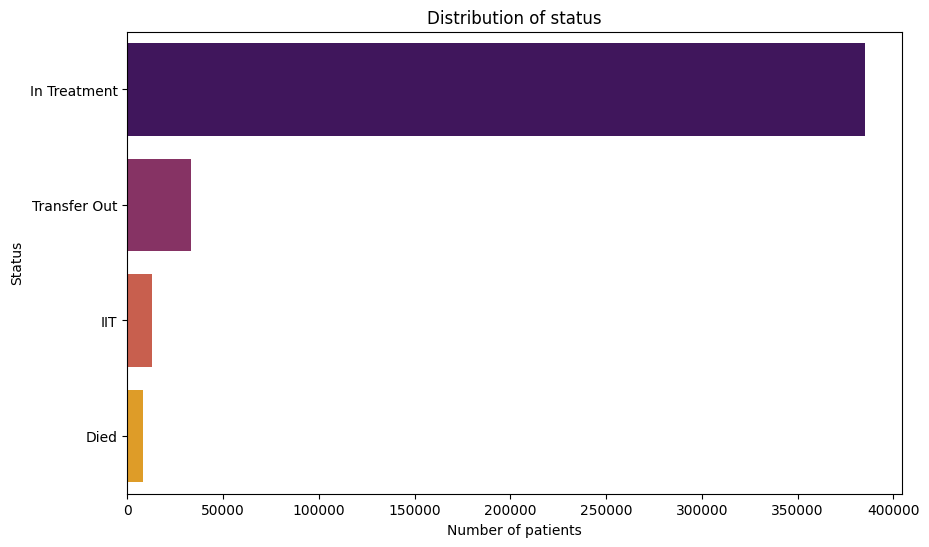

In [93]:
# Distribution of Status: Seaborns countplot

status = final_df['Status'].value_counts() 
plt.figure(figsize=(10, 6))
sns.countplot(data=final_df, y='Status', palette='inferno')
plt.xlabel('Number of patients')
plt.ylabel('Status')
plt.title('Distribution of status')
plt.show()

The bar plot above indicates that a big portion of the patients being considered have not yet interrupted in treatment. This portion is followed by those who have transfered out, those who have interrupted in treatment and finally those that have died.

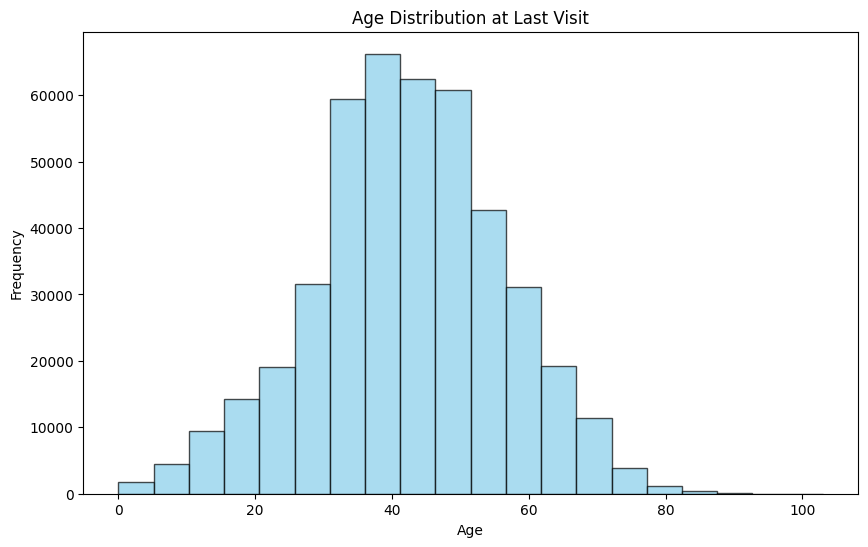

In [127]:
plt.figure(figsize=(10, 6))
plt.hist(final_df['AgeLastVisit'], bins=20, color = 'skyblue', edgecolor='k', alpha=0.7)
plt.title('Age Distribution at Last Visit')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


The histogram of the age at last visit (latest as at December 2023) shows that the age of the patients is approximately normally distributed with most of the patients being between 25 and 65 years of age.

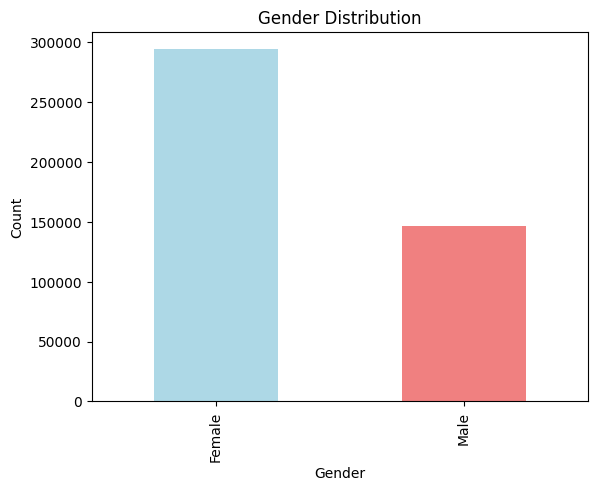

In [95]:
gender_counts = final_df['Gender'].value_counts()
gender_counts.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


The proportion of male patients is less than the proportion of female patients under care treatment.

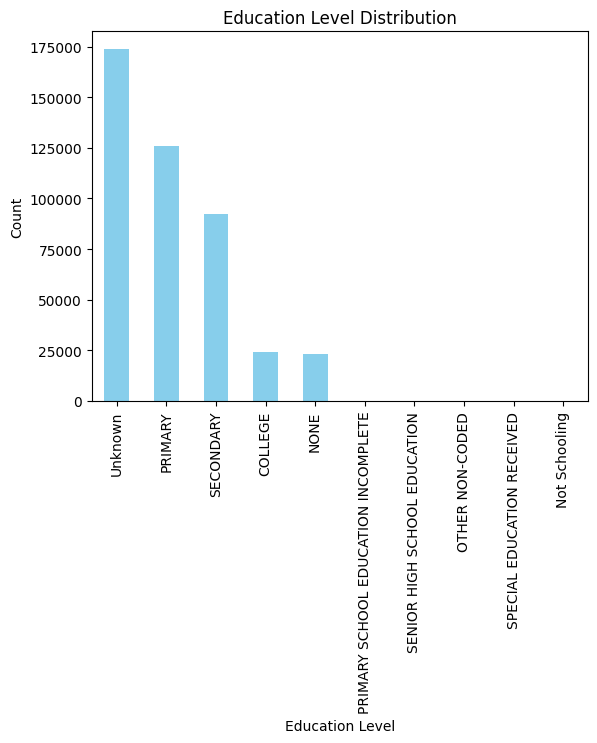

In [96]:
edu_counts = final_df['EducationLevel'].value_counts()
edu_counts.plot(kind='bar', color = 'skyblue')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


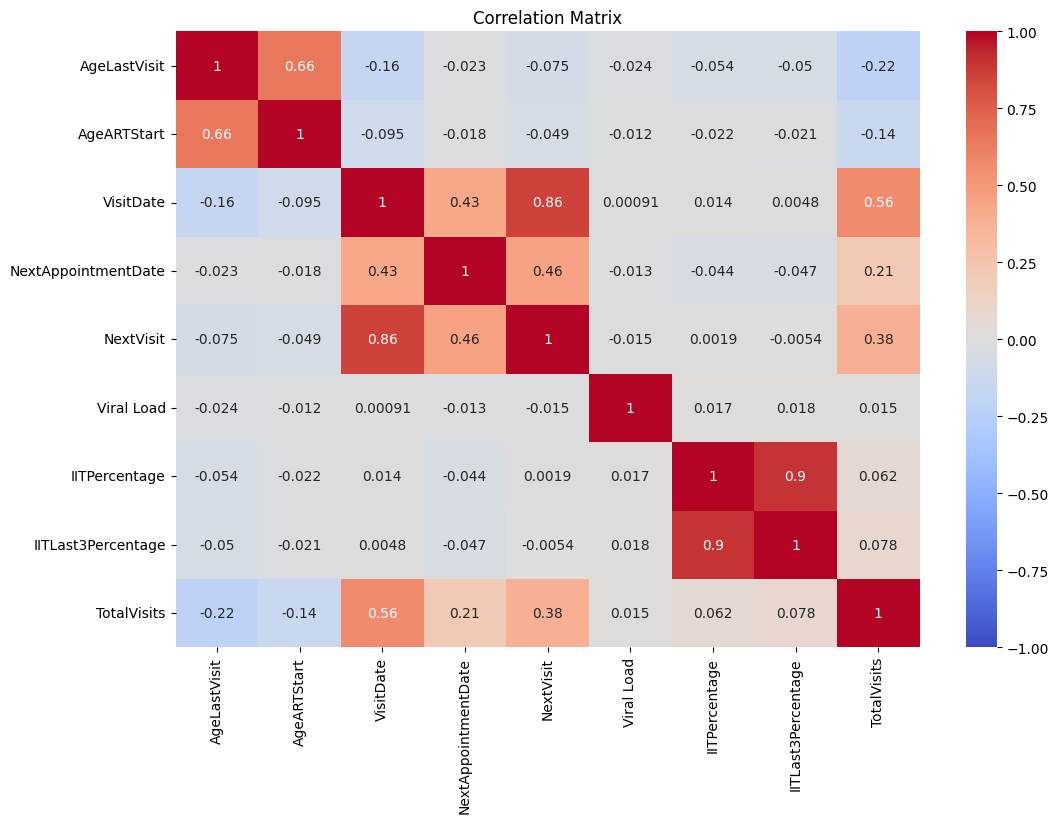

In [125]:
plt.figure(figsize=(12, 8))
sns.heatmap(final_df[['AgeLastVisit','AgeARTStart','VisitDate','NextAppointmentDate','NextVisit','Viral Load', 'IITPercentage', 'IITLast3Percentage', 'TotalVisits']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


The variables ```VisitDate``` and ```NextVisit``` have a strong positive correlation (0.86) according to the correlation matrix of the numerical variables. This is due to the fact that the ```NextVisit``` feature is engineered from the ```VisitDate``` for each patient.

Close to this, is a moderate positive correlation between ```Age_art_start``` and ```Age_last_visit``` of (0.66) which suggests that these two variables have a moderate positive linear association.

The variables ```TotalVisits``` and  ```AgeLastVisit``` have a weak negative correlation (-0.22), implying that for older patients, the associated total number of visits is likely to be minimal.

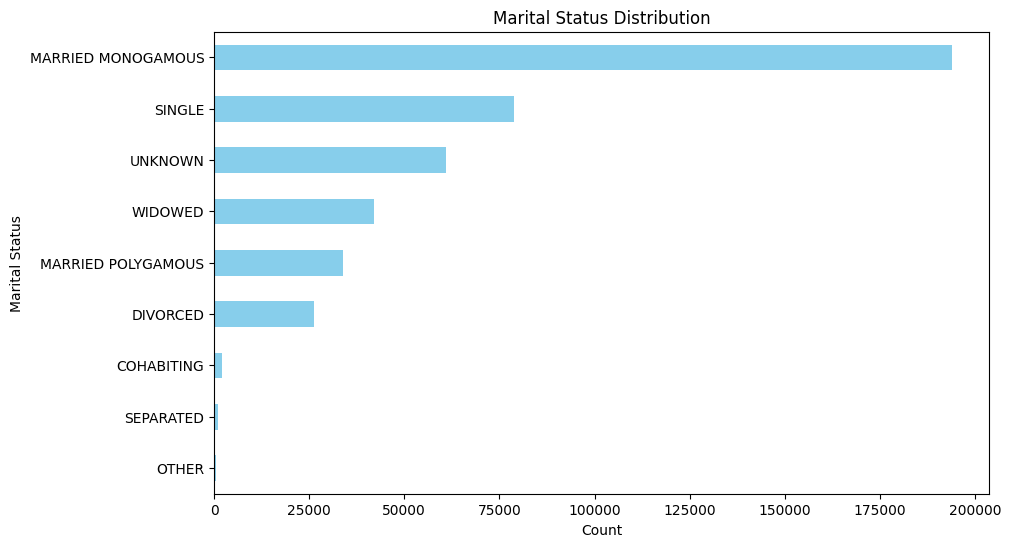

In [98]:
marital_counts = final_df['MaritalStatus'].value_counts()

plt.figure(figsize=(10, 6))
marital_counts.plot(kind='barh', color='skyblue')
plt.title('Marital Status Distribution')
plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.gca().invert_yaxis()  # Invert y-axis to display in descending order
plt.show()


The bar plot of marital status above shows the distribution of patients under care treatment by marital status. The largest portion is married monogamous followed by those that are single, then the widowed and so on while 'other' has the lowest proportion.

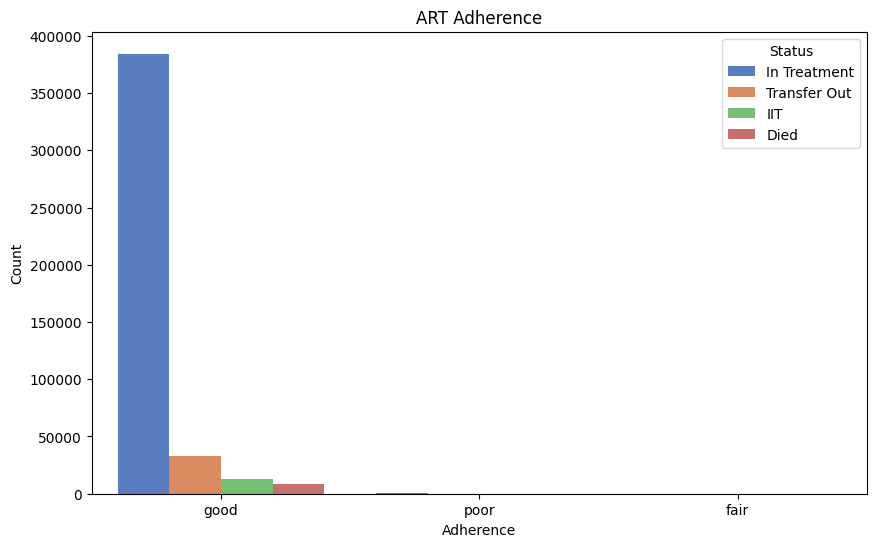

In [154]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ArtAdherence', data=final_df, palette='muted', hue='Status')
plt.title('ART Adherence')
plt.xlabel('Adherence')
plt.ylabel('Count')
plt.show()


There is a very small portion of patients who have poor ART adherence according to the bar plot of ART adherence. Among those with good adherence most of them are in treatment while a small percentage of them have died.

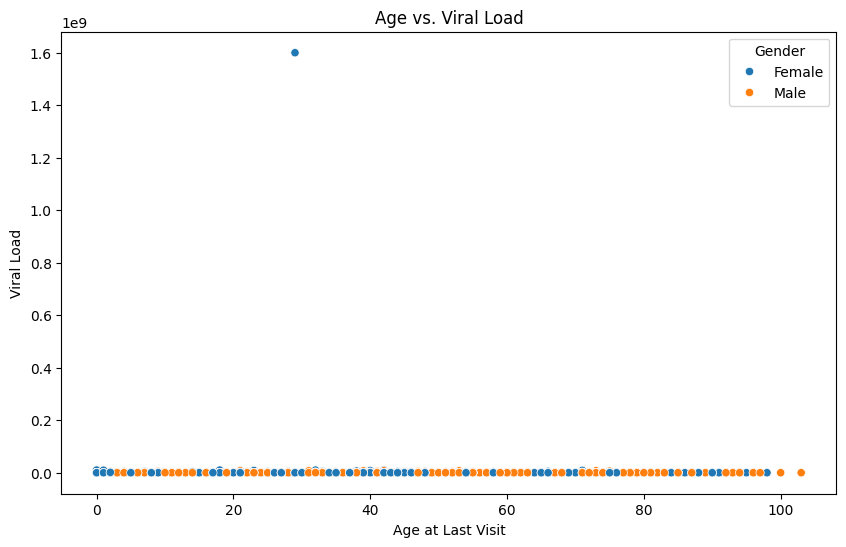

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AgeLastVisit', y='Viral Load', hue='Gender', data=final_df)
plt.title('Age vs. Viral Load')
plt.xlabel('Age at Last Visit')
plt.ylabel('Viral Load')
plt.show()


The sactter plot above shows that there is an outlier viral load value for a female patient. Thus we drop it for accurate visualization of the viral load for the patients.

In [108]:
# drop the outlier from the dataset

female_patients = final_df[final_df['Gender'] == 'Female']
highest_viral_load_index = female_patients['Viral Load'].idxmax()

# Drop that record from the DataFrame
final_df = final_df.drop(index=highest_viral_load_index)

# Reset index
final_df.reset_index(drop=True, inplace=True)

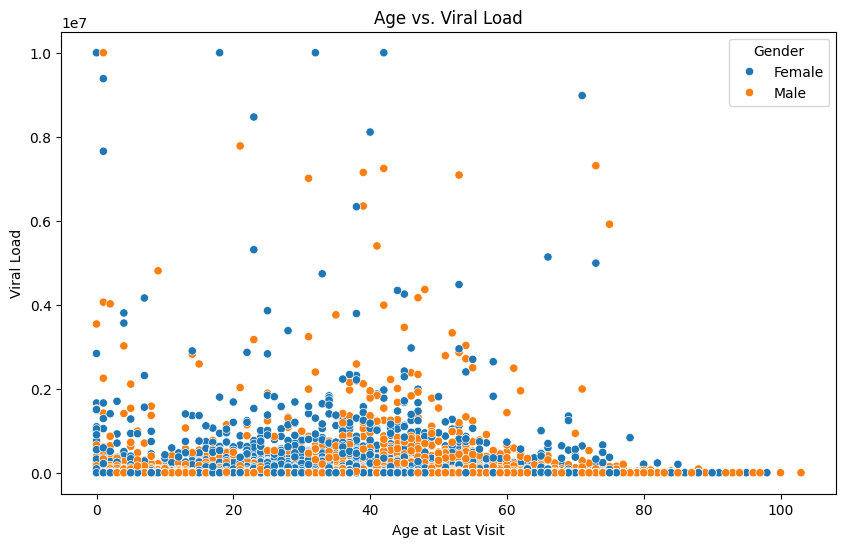

In [107]:
# plot the scatter plot again

plt.figure(figsize=(10, 6))
sns.scatterplot(x='AgeLastVisit', y='Viral Load', hue='Gender', data=final_df)
plt.title('Age vs. Viral Load')
plt.xlabel('Age at Last Visit')
plt.ylabel('Viral Load')
plt.show()


The new scatter plot of viral load against age at last visit does not contain outliers and thus it gives the actual distribution of the viral load.

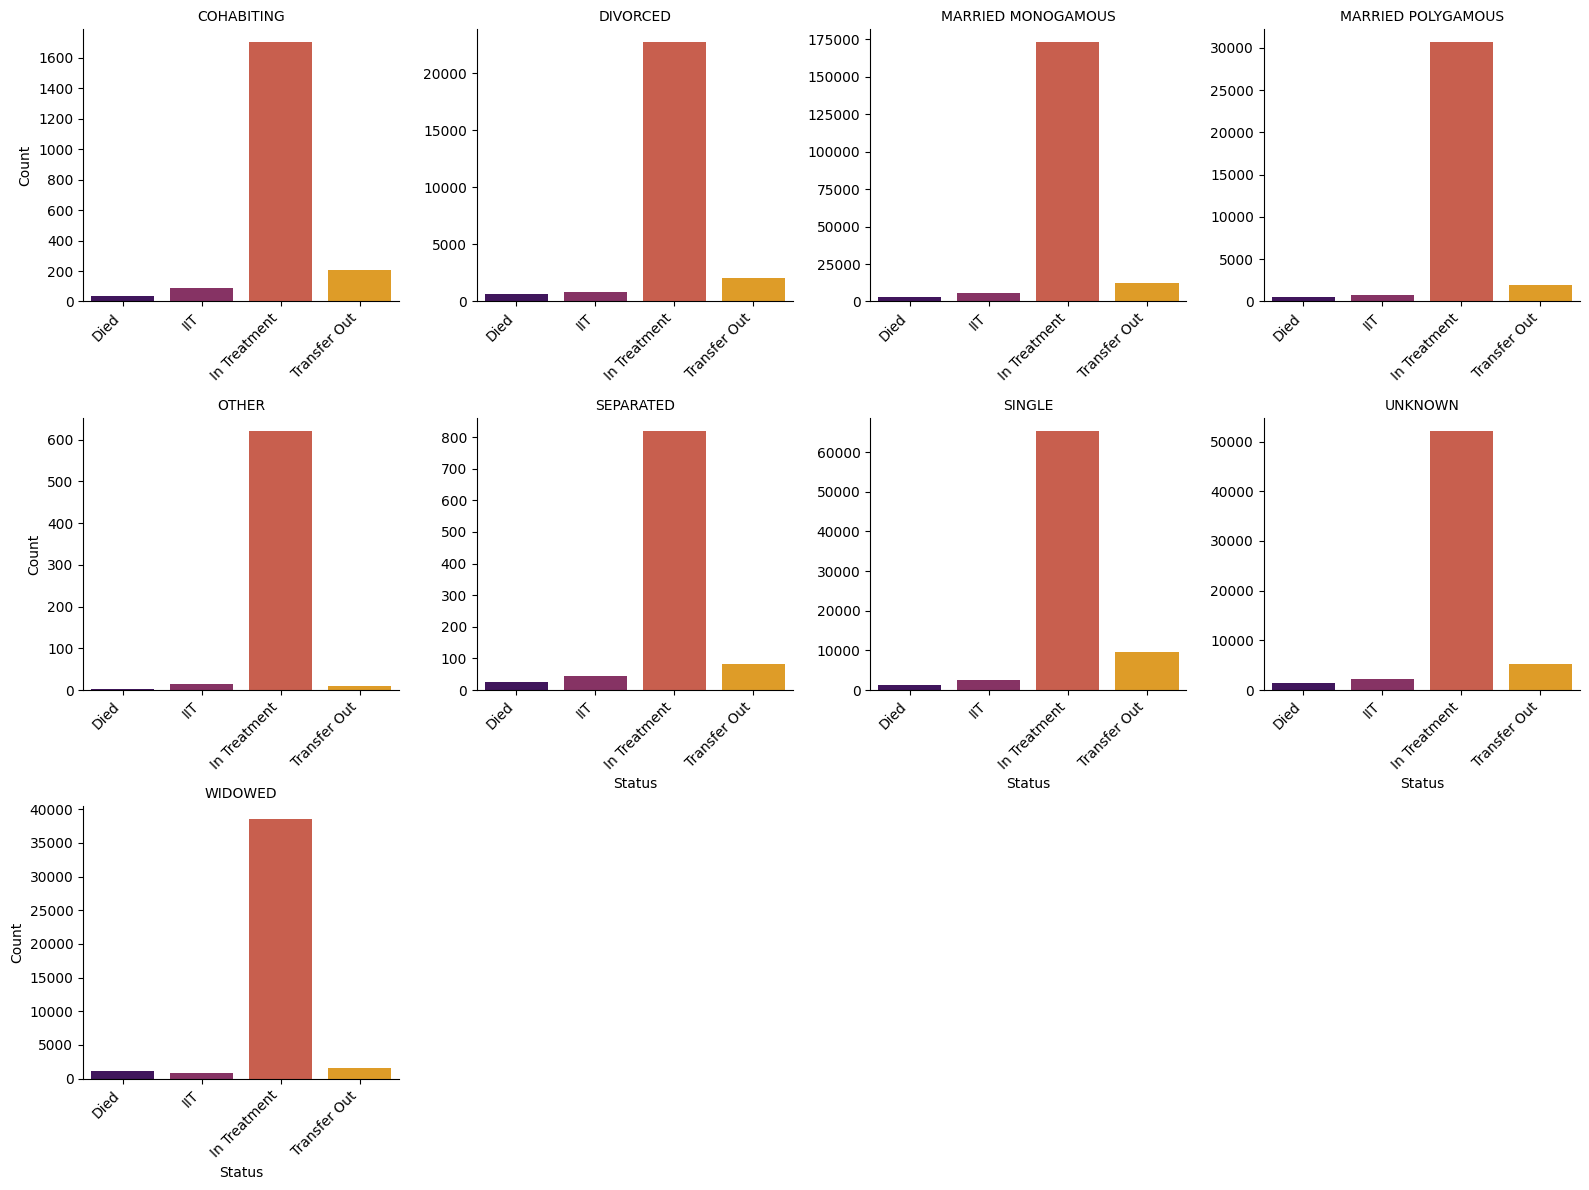

In [110]:
# Create a count of Status by MaritalStatus
status_marital_counts = final_df.groupby(['Status', 'MaritalStatus']).size().reset_index(name='Count')

# Create a FacetGrid
g = sns.FacetGrid(status_marital_counts, col='MaritalStatus', col_wrap=4, height=4, sharex=False, sharey=False)

# Map the bar plot to the grid
g.map_dataframe(sns.barplot, x='Status', y='Count', palette='inferno')

# Adjust the titles and labels
g.set_axis_labels('Status', 'Count')
g.set_titles(col_template='{col_name}')
g.set_xticklabels(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

In the facet plot of marital status counts against Status, the greatest portion for each category consists of the patients in treatment followed by those who have transfered out while the smallest portion consists of those who have died. 

This suggests that the marital status of the patient does not have a significant impact on the status of the patient.

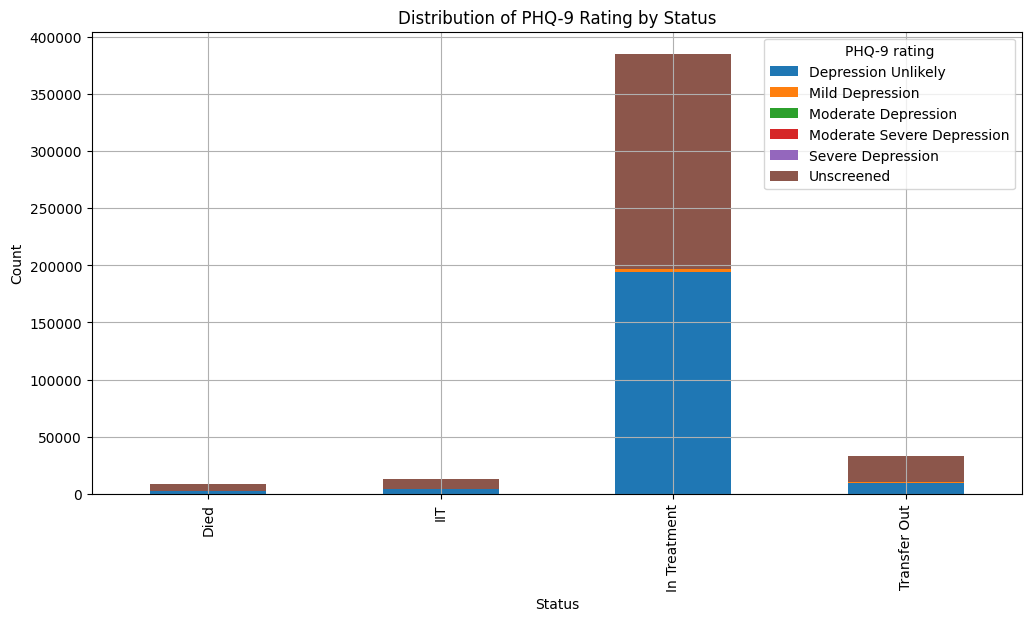

In [122]:
# Calculate the counts
counts = final_df.groupby(['Status','PHQ_9_rating']).size().unstack(fill_value=0)

# Plot the stacked bar plot
counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# Set plot title and labels
plt.title('Distribution of PHQ-9 Rating by Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.legend(title='PHQ-9 rating')

# Add grid
plt.grid(True)

# Show the plot
plt.show()

The stacked bar plot for the distribution of PHQ-9 rating by status shows that a great portion of the unscreened patients and those who are unlikely to have depression contribute significantly to the status of the patient.

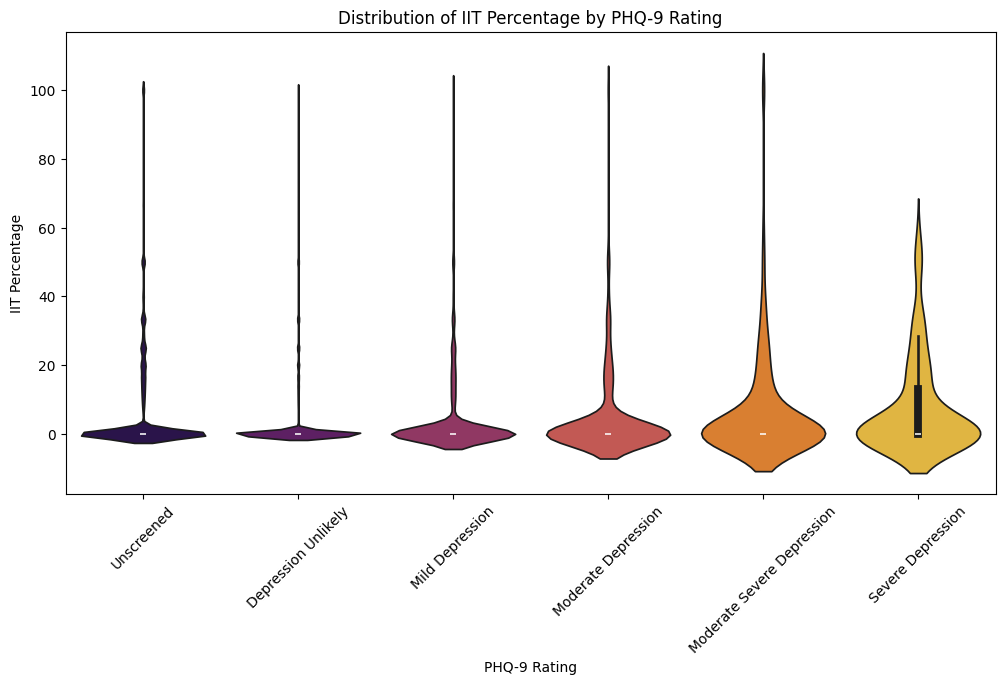

In [155]:
# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=final_df, x='PHQ_9_rating', y='IITPercentage', palette='inferno')

# Set plot title and labels
plt.title('Distribution of IIT Percentage by PHQ-9 Rating')
plt.xlabel('PHQ-9 Rating')
plt.ylabel('IIT Percentage')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


The violin plot for the distribution of IIT percentage by PHQ-9 rating shows that the patients with moderate to severe depression have a high percentage of interrupting in treatment while those in the ```Unscreened``` and the ```Depression Unlikely``` categories have smaller percentages of interrupting in treatment.

This suggests that the PHQ-9 rating of a patient plays a role in determining if the patient will interrupt in treatment or not. The same pattern is observed in the violin plot for the last 3 visits shown below.

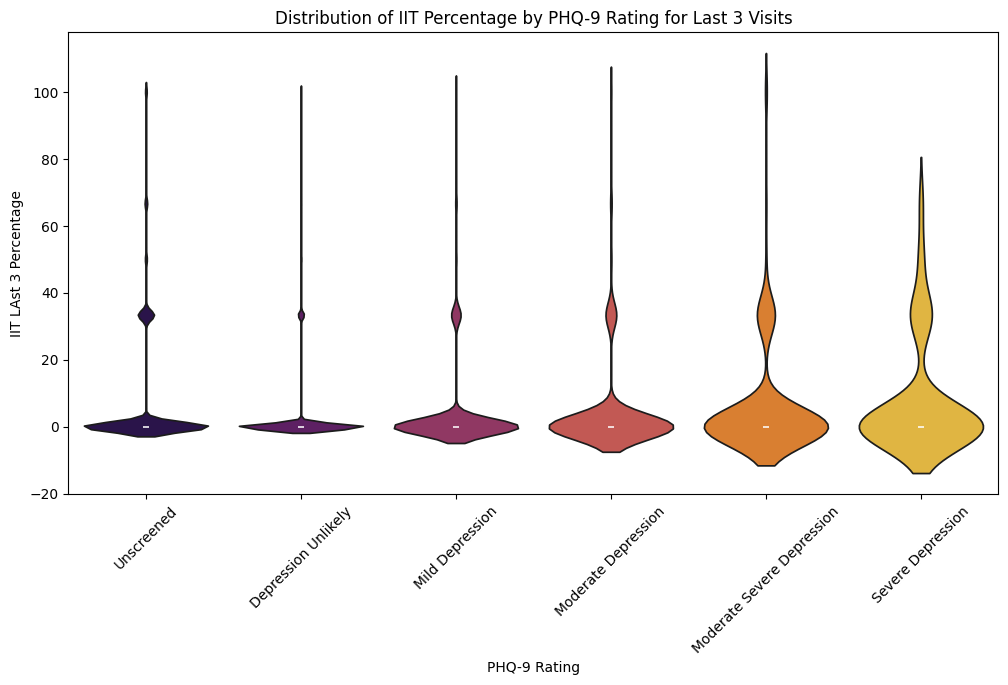

In [159]:
# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=final_df, x='PHQ_9_rating', y='IITLast3Percentage', palette='inferno')

# Set plot title and labels
plt.title('Distribution of IIT Percentage by PHQ-9 Rating for Last 3 Visits')
plt.xlabel('PHQ-9 Rating')
plt.ylabel('IIT LAst 3 Percentage')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [158]:
# Writing into a csv file for modelling
final_df.to_csv('final_dataframe_updated.csv', index=False)